# Predict Stock Price

In [37]:
# !pip install yfinance

In [38]:
import yfinance as yf

msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")

In [39]:
import os
import pandas as pd

DATA_PATH = "msft_data.json"

if os.path.exists(DATA_PATH):
    with open(DATA_PATH) as f:
        msft_hist = pd.read_json(DATA_PATH)
else:
    msft = yf.Ticker("MSFT")
    msft_hist = msft.history(period="max")

    msft_hist.to_json(DATA_PATH)



In [40]:
msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13 05:00:00,0.055004,0.063093,0.055004,0.060396,1031788800,0.0,0.0
1986-03-14 05:00:00,0.060396,0.063632,0.060396,0.062553,308160000,0.0,0.0
1986-03-17 05:00:00,0.062553,0.064172,0.062553,0.063632,133171200,0.0,0.0
1986-03-18 05:00:00,0.063632,0.064172,0.061475,0.062014,67766400,0.0,0.0
1986-03-19 05:00:00,0.062014,0.062553,0.060396,0.060936,47894400,0.0,0.0


<Axes: >

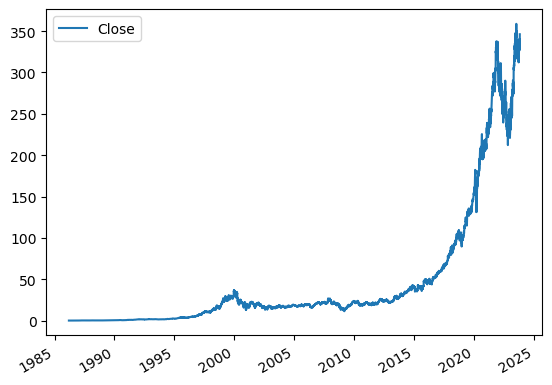

In [41]:
msft_hist.plot.line(y="Close", use_index=True)

In [42]:
data = msft_hist[["Close"]]
data

,Close
1986-03-13 05:00:00,0.060396
1986-03-14 05:00:00,0.062553
1986-03-17 05:00:00,0.063632
1986-03-18 05:00:00,0.062014
1986-03-19 05:00:00,0.060936
...,...
2023-10-26 04:00:00,327.890015
2023-10-27 04:00:00,329.809998
2023-10-30 04:00:00,337.309998
2023-10-31 04:00:00,338.109985


In [43]:
data = data.rename(columns= {'Close' : 'Actual_Close'})
data

,Actual_Close
1986-03-13 05:00:00,0.060396
1986-03-14 05:00:00,0.062553
1986-03-17 05:00:00,0.063632
1986-03-18 05:00:00,0.062014
1986-03-19 05:00:00,0.060936
...,...
2023-10-26 04:00:00,327.890015
2023-10-27 04:00:00,329.809998
2023-10-30 04:00:00,337.309998
2023-10-31 04:00:00,338.109985


In [44]:
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
data.head()

,Actual_Close,Target
1986-03-13 05:00:00,0.060396,NaN
1986-03-14 05:00:00,0.062553,1.0
1986-03-17 05:00:00,0.063632,1.0
1986-03-18 05:00:00,0.062014,0.0
1986-03-19 05:00:00,0.060936,0.0


In [45]:
msft_prev = msft_hist.copy()
msft_prev = msft_prev.shift(1)
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1986-03-13 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 05:00:00,0.055004,0.063093,0.055004,0.060396,1.031789e+09,0.0,0.0
1986-03-17 05:00:00,0.060396,0.063632,0.060396,0.062553,3.081600e+08,0.0,0.0
1986-03-18 05:00:00,0.062553,0.064172,0.062553,0.063632,1.331712e+08,0.0,0.0
1986-03-19 05:00:00,0.063632,0.064172,0.061475,0.062014,6.776640e+07,0.0,0.0


In [46]:
# train data 설정
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
data = data.join(msft_prev[predictors]).iloc[1:]
data.head()

,Actual_Close,Target,Close,Volume,Open,High,Low
1986-03-14 05:00:00,0.062553,1.0,0.060396,1.031789e+09,0.055004,0.063093,0.055004
1986-03-17 05:00:00,0.063632,1.0,0.062553,3.081600e+08,0.060396,0.063632,0.060396
1986-03-18 05:00:00,0.062014,0.0,0.063632,1.331712e+08,0.062553,0.064172,0.062553
1986-03-19 05:00:00,0.060936,0.0,0.062014,6.776640e+07,0.063632,0.064172,0.061475
1986-03-20 05:00:00,0.059318,0.0,0.060936,4.789440e+07,0.062014,0.062553,0.060396


In [47]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [48]:
# train, test dataset설정
train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [49]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test['Target'], preds)

0.6666666666666666

<Axes: >

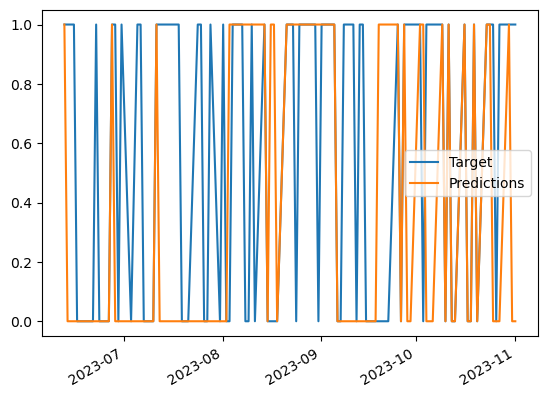

In [50]:
combined = pd.concat({'Target' : test['Target'], 'Predictions' : preds}, axis=1)
combined.plot()

In [51]:
i = 1000
step = 750

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
model.fit(train[predictors], train['Target'])
preds = model.predict(test[predictors])

In [52]:
preds = model.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .6] = 1
preds[preds <= .6] = 0

In [53]:
preds.head()

1990-02-27 05:00:00    1.0
1990-02-28 05:00:00    1.0
1990-03-01 05:00:00    0.0
1990-03-02 05:00:00    1.0
1990-03-05 05:00:00    1.0
dtype: float64

In [54]:
predictions = []
for i in range(1000, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    model.fit(train[predictors], train['Target'])

    preds = model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds <= .6] = 0

    combined = pd.concat({'Target' : test['Target'], "Predictions" : preds}, axis=1)

    predictions.append(combined)

In [55]:
predictions[0].head()

,Target,Predictions
1990-02-27 05:00:00,0.0,1.0
1990-02-28 05:00:00,1.0,1.0
1990-03-01 05:00:00,1.0,0.0
1990-03-02 05:00:00,1.0,1.0
1990-03-05 05:00:00,1.0,1.0


In [56]:
def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    for i in range(1000, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        model.fit(train[predictors], train['Target'])

        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds <= .6] = 0

        combined = pd.concat({'Target' : test['Target'], "Predictions" : preds}, axis=1)

        predictions.append(combined)

        return pd.concat(predictions)

In [57]:
predictions = backtest(data, model, predictors)

In [58]:
predictions["Predictions"].value_counts()

Predictions
1.0    554
0.0    196
Name: count, dtype: int64

In [59]:
predictions["Target"].value_counts()

Target
1.0    381
0.0    369
Name: count, dtype: int64

In [60]:
weekly_mean = data.rolling(7).mean()['Close']
quarterly_mean = data.rolling(90).mean()['Close']
annual_mean = data.rolling(365).mean()['Close']

In [61]:
weekly_trend = data.shift(1).rolling(7).sum()['Target']

In [62]:
data['weekly_mean'] = weekly_mean / data['Close']
data['quarterly_mean'] = quarterly_mean / data['Close']
data['annual_mean'] = annual_mean / data['Close']

In [63]:
data['annual_weekly_mean'] = data['annual_mean'] / data['weekly_mean']
data['annual_quarterly_mean'] = data['annual_mean'] / data['quarterly_mean']

In [64]:
data['weekly_trend'] = weekly_trend

In [65]:
data['open_close_ratio'] = data['Open'] / data['Close']
data['high_close_ratio'] = data['High'] / data['Close']
data['low_close_ratio'] = data['Low'] / data['Close']

In [66]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", 
                                "annual_weekly_mean", "annual_quarterly_mean", 
                                "open_close_ratio", "high_close_ratio", "low_close_ratio"]


In [67]:
predictions = backtest(data.iloc[365:], model, full_predictors)
precision_score(predictions["Target"], predictions["Predictions"])

c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [68]:
predictions['Predictions'].value_counts()

Predictions
0.0    750
Name: count, dtype: int64

In [71]:
predictions

,Target,Predictions
1991-08-07 04:00:00,1.0,0.0
1991-08-08 04:00:00,1.0,0.0
1991-08-09 04:00:00,1.0,0.0
1991-08-12 04:00:00,1.0,0.0
1991-08-13 04:00:00,0.0,0.0
...,...,...
1994-07-19 04:00:00,0.0,0.0
1994-07-20 04:00:00,0.0,0.0
1994-07-21 04:00:00,0.0,0.0
1994-07-22 04:00:00,1.0,0.0


<Axes: >

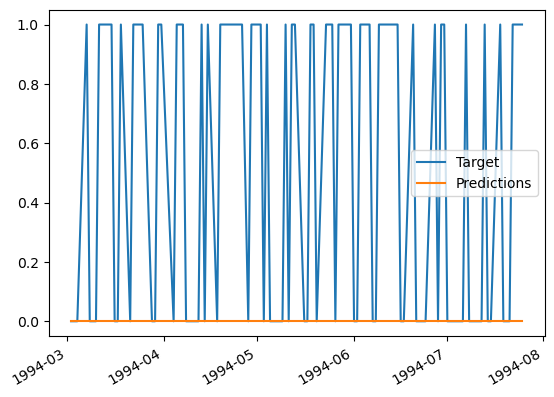

In [70]:
predictions.iloc[-100:].plot()

https://www.dataquest.io/blog/portfolio-project-predicting-stock-prices-using-pandas-and-scikit-learn/